<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2025 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Anna-Lena Erdmann (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4data/wekeo-earthkit/01_WEkEOEarthkit_Introduction.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>    
</html>

<div class="alert alert-block alert-success">
<h3>Earthkit WEkEO Plugins: Introduction</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
  - **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** if you are using or plan to use WEkEO.

There are no prerequisite notebooks for this module.
</div>
<hr>

# 1 Accessing WEkEO datasets using the Earthkit WEkEO Plugins

### Data used

| Product Description  | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-------------:|:-----------------:|
| ERA5 monthly averaged data on single levels from 1940 to present | EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3AREANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS" target="_blank">link</a> | ERA5 hourly data on single levels from 1940 to present  | EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3AREANALYSIS_ERA5_SINGLE_LEVELS" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know;
* how to access datasets from WEkEO using the <font color="#138D75">**Earthkit WEkEO Plugin**</font> 
* how to convert the datasets to an xArray and perform data analysis and visualization
* how to merge multiple datasets accessed through the <font color="#138D75">**Earthkit WEkEO Plugin**</font> to one xArray

### Outline


EarthKit is an open-source Python project led by the European Centre for Medium-Range Weather Forecasts (ECMWF). It provides powerful tools to streamline workflows in weather and climate science by simplifying data access, processing, analysis, and visualization. WEkEO is now available as inherent data source in the earthkit-data python package. It is now possible to access most of the WEkEO datasets using the Earthkit wrapper functions. This notebook gives an overview on how to use the Earthkit WEkEO Plugin for data access, analysis and visualization. 

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Installation](#section0)
 1. [Download Datasets using the Earthkit Plugin](#section1)
 1. [Data Exploration with xArray](#section2)
 1. [Combining multiple datasets](#section3)

<hr>

<div class="alert alert-info" role="alert">

## 1. <a id='section0'></a>Installation
[Back to top](#TOC_TOP)
    
</div>





### WEkEO

WEkEO is the Copernicus Data Information and Access Service (DIAS) reference service for environmental data. It is a partnership between EUMETSAT, the European Centre for Medium-range Weather Forecasting (ECMWF), Mercator Ocean International, and the European Environment Agency (EEA). WEkEO offers a harmonised data access (HDA) solution to a wide range of Copernicus data. 

### Earthkit and the WEkEO Plugin in earthkit-data
<a href="https://earthkit.readthedocs.io/en/latest/" target="_blank">Earthkit</a> EarthKit is an open-source Python project led by the European Centre for Medium-Range Weather Forecasts (ECMWF). It provides powerful tools to streamline workflows in weather and climate science by simplifying data access, processing, analysis, and visualization. It is allowing users to focus on science instead of technical issues such as data access and data formats. <a href="https://earthkit-data.readthedocs.io/en/latest/" target="_blank">Earthkit-data</a> is a format-agnostic interface for geospatial data, focusing on meteorology and climate science. There are plugins for various data forms and sources, such as S3 buckets, netcdf, GRIB, the Climate data store and now also the **WEkEO Harmonized Data Access**. With the WEkEO Plugins for Earthkit, the WEkEO HDA is used to provide a seamless access to many WEkEO datasets without worrying about data formats and file management. 

The WEkEO plugins are included in the earthkit-data package, so you will only need to download the earthkit package for running this notebook: 




In [ ]:
# ! pip install earthkit

Other modules we need for visualization, which are not pre-installed on the WEkEO Jupyter Hub:

In [ ]:
# ! pip install basemap

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import os
import earthkit
import xarray as xr
from earthkit.data import settings, cache

<div class="alert alert-info" role="alert">

## 2. <a id='section1'></a>Download Datasets using Earthkit
[Back to top](#TOC_TOP)
    
</div>

You can activate the cache for the earthkit data access. this means that the package will notice if you access the same dataset twice and falls back to the previously downloaded one. You can either set a temporary cache, or a custom cache directory you have access to. Below we define the folder "cache" as our cache directory. 

In [2]:
s = {"cache-policy": "user",
     "user-cache-directory": "./cache"}
settings.set(s)
cache.directory()

'./cache'

The function `earthkit.data.from_source` is a function that loads the dataset from the WEkEO HDA. When first downloading a dataset, you need to configure your WEkEO username and password in the pop-up below the code cell.  

The first argument of the function is always `wekeo-source` for the downloads of WEkEO datasets. The second argument is the request for the WEkEO HDA. You can reuse requests from the past of get the API request in the <a href="https://wekeo.copernicus.eu/data?view=viewer" target="_blank">WEkEO Viewer</a>

In [3]:
%%time

ds_eum = earthkit.data.from_source("wekeo-source", {
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "product_type": ["monthly_averaged_reanalysis_by_hour_of_day"],
  "variable": ["2m_temperature"],
  "year": ["2019"],
  "month": ["01"],
  "time": ["00:00","01:00","02:00","03:00","04:00","05:00",
            "06:00","07:00","08:00","09:00","10:00","11:00",
            "12:00","13:00","14:00","15:00","16:00","17:00",
            "18:00","19:00","20:00","21:00","22:00","23:00"],
  "data_format": "netcdf",
  "download_format": "zip",
  "itemsPerPage": 200,
  "startIndex": 0
})


CPU times: total: 922 ms
Wall time: 2.7 s


The data is now stored in cache. No need for you to worry about file management in your local file system. Be aware, that the data will be deleted from cache once the chache is cleared. Running again the `earthkit.data.from_source` for the same dataset and the identical parameters will not trigger a new download, but will use the cached data instead. You can try it out and will realize, that the time of executing the second cell is faster, because the data has already been downloaded

In [4]:
%%time

ds_eum = earthkit.data.from_source("wekeo-source", {
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "product_type": ["monthly_averaged_reanalysis_by_hour_of_day"],
  "variable": ["2m_temperature"],
  "year": ["2019"],
  "month": ["01"],
  "time": ["00:00","01:00","02:00","03:00","04:00","05:00",
            "06:00","07:00","08:00","09:00","10:00","11:00",
            "12:00","13:00","14:00","15:00","16:00","17:00",
            "18:00","19:00","20:00","21:00","22:00","23:00"],
  "data_format": "netcdf",
  "download_format": "zip",
  "itemsPerPage": 200,
  "startIndex": 0
})

CPU times: total: 15.6 ms
Wall time: 25.5 ms


With the ``earthkit.to_xarray`` function that downloaded data is directly converted to an xArray. 

In [5]:
t_monthly = ds_eum.to_xarray()

In [6]:
t_monthly

<xarray.Dataset> Size: 100MB
Dimensions:     (valid_time: 24, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2019-01-01 ... 2019-01-01T23...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 384B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 100MB dask.array<chunksize=(12, 361, 720), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

<div class="alert alert-info" role="alert">

## 3. <a id='section2'></a>Data Exploration with xArray
[Back to top](#TOC_TOP)
    
</div>

After the conversion to xArray, you can directly explore, analyze and visualize the data with the common xArray functions.

The following example ``sel`` (selects) a subset by ``slicing`` the data in the ``latitude`` and ``longitude`` dimension. This created a spatial subset of the approximate area of Germany. Next, the ``time`` dimension is reduced and an average of all 24 hours is created with the ``mean`` function. Finally the mean is visualizes as a line chart with ``plot.line``.

Text(0.5, 1.0, 'Diurnal Temperature Cycle for Germany, Jan. 2019')

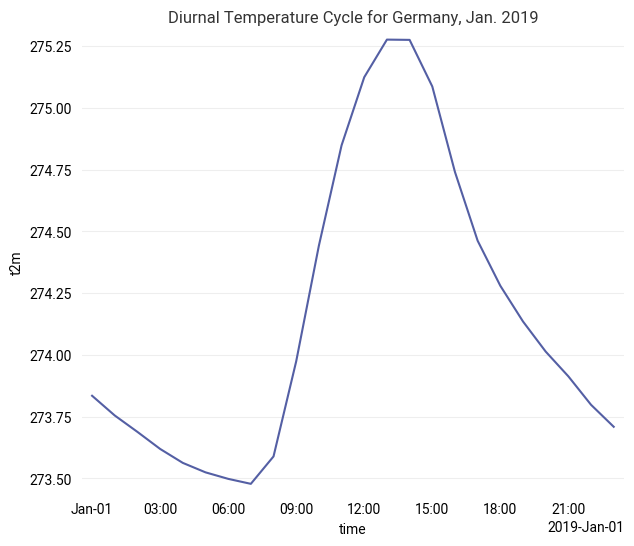

In [7]:
import matplotlib.pyplot as plt

t_monthly.t2m.sel( latitude=slice( 56, 47), longitude = slice(5, 16)).mean(dim=["latitude", "longitude"]).plot.line(x="valid_time")
plt.title ("Diurnal Temperature Cycle for Germany, Jan. 2019")

It is possible to do arithmtic operations of the differnt time steps of the dataset. Two data arrays of single time steps are subtracted from each other to create a temperature difference map. The temperature difference between 00:00 UTM and 12:00 UTM is shown across the globe. The temperature difference is inverted with the changing day and night cycle across the globe.

Text(0.5, 1.0, 'Temperature Difference between 00:00 UTM and 12:00 UTM')

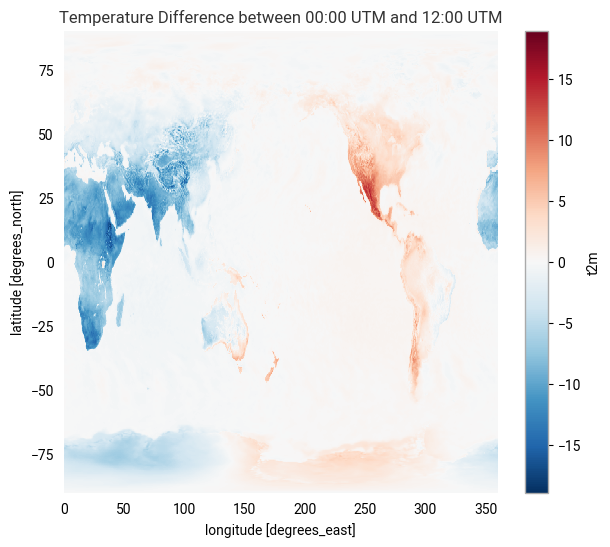

In [8]:
# plotting the temperature difference between UTM 00:00 and UTM 12:00 : 
diff=t_monthly.t2m.isel(valid_time=0) - t_monthly.t2m.isel(valid_time=11)  
diff.plot()
plt.title("Temperature Difference between 00:00 UTM and 12:00 UTM")

<hr>
<div class="alert alert-info" role="alert">

## 4. <a id='section3'></a>Combining multiple datasets
[Back to top](#TOC_TOP)

</div>


Using the WEkEO Earthkit Plugin, datasets from different sources can be downloaded and combined. This section will show you how to deal with multiple datasts. Next, we add the daily temperature data from 1st January 2019 to compare it against the monthly temperature means downloaded above.

In [9]:
                    
ds_day = earthkit.data.from_source("wekeo-source", {
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS",
  "product_type": ["reanalysis"],
  "variable": ["2m_temperature"],
  "year": ["2019"],
  "month": ["01"],
  "day": ["01"], 
  "time": ["00:00","01:00","02:00","03:00","04:00","05:00",
            "06:00","07:00","08:00","09:00","10:00","11:00",
            "12:00","13:00","14:00","15:00","16:00","17:00",
            "18:00","19:00","20:00","21:00","22:00","23:00"],
  "data_format": "netcdf",
  "download_format": "zip",
  "itemsPerPage": 200,
  "startIndex": 0
})

In [12]:
t_daily= ds_day.to_xarray()

In [13]:
t_daily

<xarray.Dataset> Size: 100MB
Dimensions:     (valid_time: 24, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 192B 2019-01-01 ... 2019-01-01T23...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 384B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 100MB dask.array<chunksize=(12, 361, 720), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-10T09:27 GRIB to CDM+CF via cfgrib-0.9.1...

Looking at the variable names, the monthly and daily dataset have the same name for the temperature variable ``t2m``. Therefore it is necessary to rename the variable name of at least one dataset before merging. 

In [14]:
t_daily = t_daily.rename({'t2m':'t2m_daily'})

The ``merge`` function merges two datasets with identical dimensions. This works out well in this case. If you want to combine datasets with other characteristics you might want to use different function to  combine datasets such as ``concat``, ``combine_by_ccords``, or ``combine_nested``. A detailled documentation about the functions is available <a href="https://docs.xarray.dev/en/stable/user-guide/combining.html" target="_blank">here</a>.

In [15]:
t = t_monthly.merge(t_daily)

You can now compare the daily temperature on the 1st of January 2019 against the mean temperature in January in Germany. 

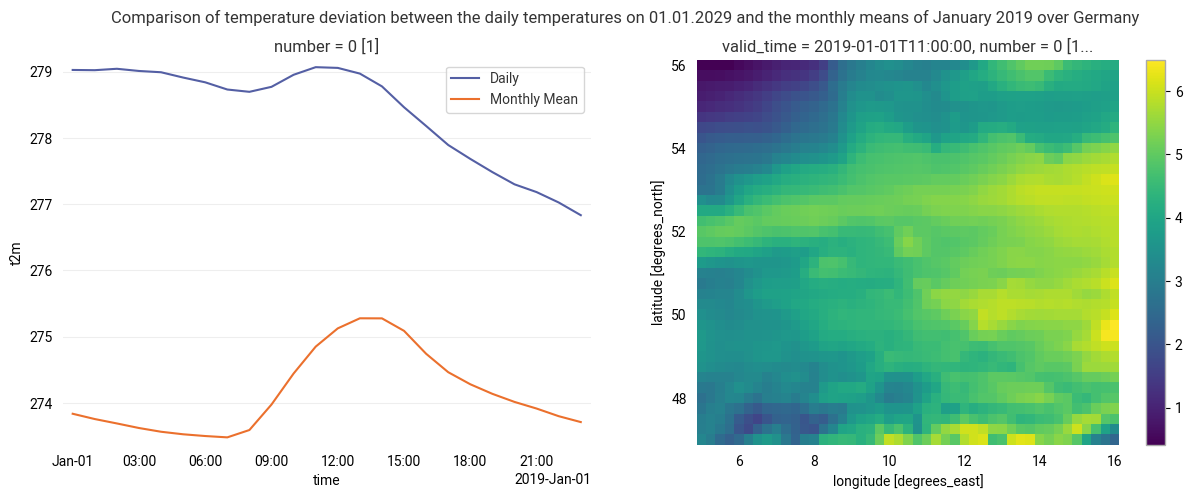

In [16]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle ("Comparison of temperature deviation between the daily temperatures on 01.01.2029 and the monthly means of January 2019 over Germany")


t.t2m_daily.sel( latitude=slice( 56, 47), longitude = slice(5, 16)).mean(dim=["latitude", "longitude"]).plot.line(x="valid_time", label="Daily", ax=ax1)
t.t2m.sel( latitude=slice( 56, 47), longitude = slice(5, 16)).mean(dim=["latitude", "longitude"]).plot.line(x="valid_time", label="Monthly Mean", ax=ax1)

diff = t.sel( latitude=slice( 56, 47), longitude = slice(5, 16)).t2m_daily - t.t2m
diff.isel(valid_time=11).plot(ax=ax2)
ax1.legend()

Let's plot the temperature data with some additional data, e.g. the outlines of countries to create maps that can be interpreted more easily. The ``Basemap`` fonction from the mpl_toolkits module includes the country outlines. 

The spatial information of the country outlines is projected on a ``[-180 , 180]`` geographical grid. The temperature data is gridded on longitude values between ``[0, 360]``. To bring both data together, the longitude values have to be reprojected to values between ``[-180 , 180]``. This is a simple arithmetic function and is execudes with the following lines of code:   

In [17]:
t.coords['longitude'] = (t.coords['longitude'] + 180) % 360 - 180
t_reshaped = t.sortby(t.longitude)

Now you can plot the data:

Text(0.5, 1.0, 'Temperature on 01.01.2019 at 00:00')

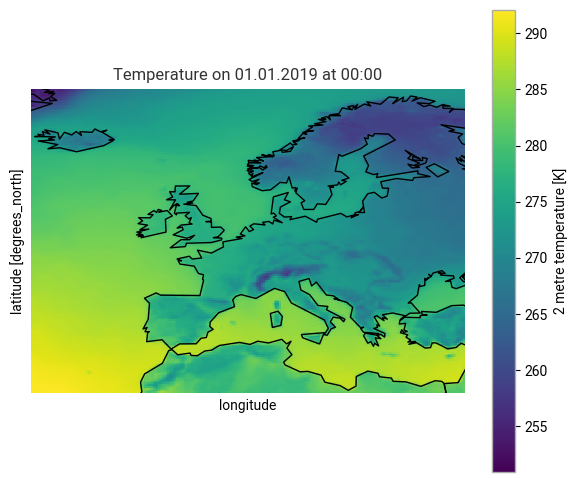

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

t_europe = t_reshaped.sel( latitude=slice(72,30), longitude = slice(-25, 35))

m = Basemap(projection='cyl', lat_0 = t_europe.t2m.latitude[0], lon_0=t_europe.t2m.longitude[0])
m.drawcoastlines()
t_europe.t2m.isel(valid_time=0).plot()
plt.title ('Temperature on 01.01.2019 at 00:00')

Finally, you can export the created data subsets for later use. It is advised that you save those intermediate results, especially when working with large datasets. It saves a lot of time when you do not have to download tha data from scratch every time the cache of yout jupyter hub is cleared.  

In [19]:
t_europe.to_zarr("temp_europe_daily_monthly_201901.zarr")

<hr>
<div class="alert alert-info" role="alert">

## <a id='section3'></a>Next Steps
[Back to top](#TOC_TOP)

</div>

<font color="#138D75">**Congratulations, you have created your own datacube out of multiple Copernicus datasets!**</font>

As a next step you can check out the **xCube Viewer** tutorials and notebooks to explore how you can visualize datacubes suhc as the one created in a graphical User interface and share it with others through a virtual machine. 

For more information on the Earthkit WEkEO Plugin, take a look at the documentation (<a href="https://earthkit-data.readthedocs.io/en/latest/examples/wekeo.html#" target="_blank">Documentation</a>). 

Other notebooks on the use of Earthkit with WEkEO datasets will follow soon and will be available in the <a href="https://notebooks.prod.wekeo2.eu/" target="_blank">Jupyter Catalogue</a>. In the meantime, check out the remaining notebooks in the <a href="https://notebooks.prod.wekeo2.eu/" target="_blank">Jupyter Catalogue</a> to get a feel on the many different datasets you can find on WEkEO, of which many can be now accessed through the Earthkit Plugin!

